w[0]: 0.393906  b: -0.031804


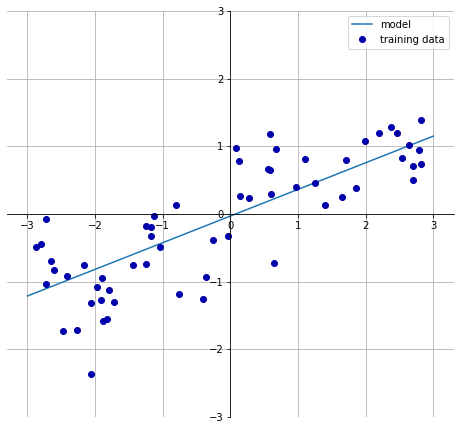

In [2]:
import mglearn
mglearn.plots.plot_linear_regression_wave()0

In [ ]:
# 릿지 회귀 Ridge Regression

In [4]:
# 라쏘 회귀 Lasso Regression
X, y = mglearn.datasets.load_extended_boston()

In [5]:
X.shape
# 104개 차원이 존재
# 차원을 줄여서 OVERFITTING을 해결해야함 (꼭 필요한 차원(특성)만 사용하면 모델 이해도 상승, 과대적합 해결)

(506, 104)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [11]:

print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))
# 다소 큰 성능차이로 인해 모델이 과대적합되었다는 사실을 도출해낼 수 있다.

0.9520519609032729
0.607472195966585


In [18]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

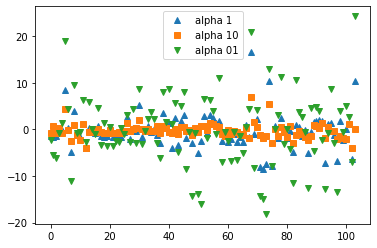

In [32]:
import matplotlib.pyplot as plt
plt.plot(ridge.coef_, '^', label = 'alpha 1')
plt.plot(ridge10.coef_, 's', label = 'alpha 10')
plt.plot(ridge01.coef_, 'v', label = 'alpha 01')
## alpha 값이 증가 => 규제도 상승

# 선형회귀
##plt.plot(lr.coef_, 'o', label = 'LinearRegression')
plt.legend()
plt.show()

In [23]:
# 계수 알아보기
ridge.coef_.shape
# X_train.shape = (379, 104)     104개의 차원을 가지고 있으므로 계수는 104개

(104,)

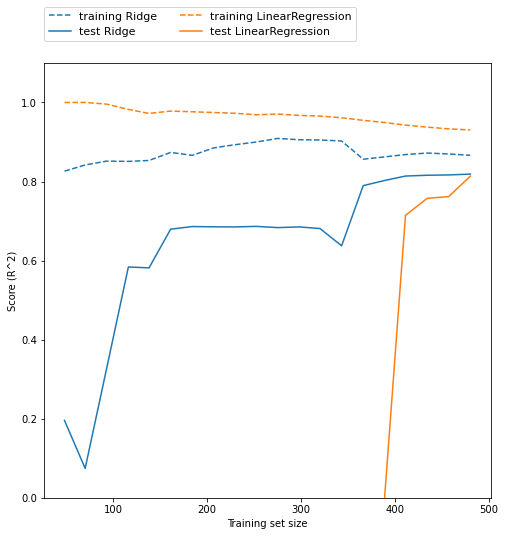

In [34]:
plt.figure(figsize=(8,8))
mglearn.plots.plot_ridge_n_samples()

In [35]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)

In [36]:
lasso.score(X_train, y_train)

0.29323768991114607

In [37]:
lasso.score(X_test, y_test)

0.20937503255272294

In [38]:
import numpy as np
np.sum(lasso.coef_ != 0)

4

In [42]:
lasso001 = Lasso(alpha=0.01, max_iter=50000).fit(X_train, y_train)
print(lasso001.score(X_train, y_train))
print(lasso001.score(X_test, y_test))
print(np.sum(lasso001.coef_ != 0))

0.8962226511086497
0.7656571174549983
33


In [47]:
lasso00001 = Lasso(alpha=0.0001, max_iter=50000).fit(X_train, y_train)
print(np.sum(lasso00001.coef_ != 0))

96


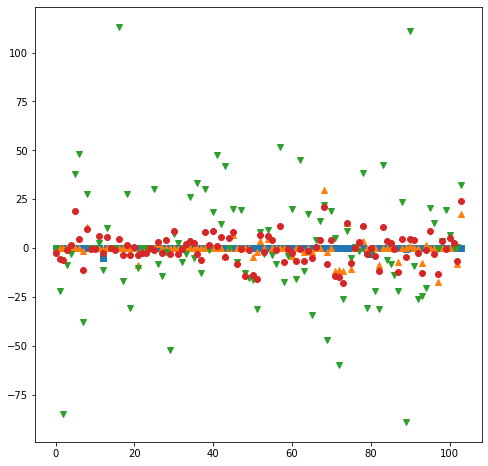

In [48]:
plt.figure(figsize=(8,8))
plt.plot(lasso.coef_, 's')
plt.plot(lasso001.coef_, '^')
plt.plot(lasso00001.coef_, 'v')

plt.plot(ridge01.coef_, 'o')
plt.show()